## Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name:Zihan

Last Name: Mo

Student ID: 914998952

## Instructions

Please print your answer notebook to pdf (make sure that it is not unnecessarily long due to long output) and submit as the homework solution with your zip file.

For readability you,

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement
- you may add multiple cells between exercise cells

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

## Trans-Atlantic Slave Trade

In this homework, we will uncover some of the numbers behind the Trans-atlantic slave trade (TAST), also known as the middle passage, that brought African slaves to the Americas.  The middle passage is reported to have forcibly migrated over 10 million Africans to the Americas over a roughly 3 century time span.  Many aspects of the TAST is little known by most people, such as the countries that constituted this network of slave ships, the regions from which the slaves were taken, and the number of slaves captured from Africa.

This last number is especially important since the number of slaves taken from Africa can impact other estimates that result from this.  For example, when estimating the population of Africa in a given decade, demographers will use population growth models and more recent census data.  For example, there are roughly X number of people in Africa and such populations tend to grow at rate M.  Then if we want to calculate the population one century ahead then we just apply a simple formula that assumes that the population grows at this rate.  But if the population is being drained by the slave trade, then this number will tend to be underestimated because the growth rate is overestimated.  To account for this models need to take into account this drain on the population.

Throughout this homework you will need to follow the principles of graphical excellence and the grammar of graphics.  **Use only Plotnine for your graphics**, do not use Pyplot, Seaborn, or Plotly since they do not follow closely the grammar of graphics.  Be sure to include titles and necessary contextual captions.

**Warning:** The Trans-Atlantic Slave Trade remains one of the most horrific abuses of human rights in history.  This homework deals with the numbers behind this forced migration, please be aware that this is a sensitive topic for possibly yourself and others.   A suitable amount of respect and seriousness is required when dealing with this data.

**Exercise 1.** The data.

1. Read in the Trans-Atlantic Slave Trade database with Pandas.  Hint: if you use the unix tool `file` you can find that this CSV is encoded with iso-8859-1 character set.  Make sure that all missing values are encoded as NaN.
2. There is lots of missingness in this data, and some of these variables are imputed.  We will be imputing some of these variables ourselves, so delete any variable that ends with 'imp'.
3. Open up the pdf file: TAST_codebook.pdf which is the data dictionary for this and other related datasets.  Many of the variables in the codebook are not in this dataset because it is describing an updated dataset.
4. Create a list where you describe the meaning of the columns of your imported dataframe.  You can group similar columns together when describing their rough meaning, such as ownera,...,ownerp are owners of the slave ships.

Throughout we will disregard all time variables other than year since they are unreliable.

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import plotnine as p9
from sklearn import linear_model, metrics
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('tastdb-2010.csv',encoding='iso-8859-1',skipinitialspace=True) #set whitespace as nan

In [7]:
data.head(10)

,voyageid,evgreen,shipname,national,natinimp,placcons,yrcons,placreg,yrreg,rig,...,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
0,1,1.0,Pastora de Lima,4.0,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.0,Tibério,NaN,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.0,Paquete Real,NaN,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.0,Bom Caminho,NaN,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1.0,Benigretta,NaN,6.0,NaN,NaN,NaN,NaN,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,1.0,Voador,NaN,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,1.0,Formiga,NaN,6.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,1.0,Vigilante Africano,NaN,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,1.0,Constante,NaN,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,1.0,Comerciante,NaN,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(34941, 98)

In [4]:
imp_col = data.columns[data.columns.str.endswith('imp')] #columns that end with imp
ndata = data.drop(imp_col,axis=1)#drop columns according imp_col
ndata.shape

(34941, 89)

In [5]:
#extract year from yearam
year = []
for date in ndata.yearam:
    yr = str(date).split('/')[-1]
    year.append(float(yr))
ndata['year'] = year

{__voyageid__:Voyage identification;__evgreen__:If voyage in 1999(yes=1) CD-ROM;__shipname__:Name of the ship;
__national__:Country in which the ship registered;__placcons__:Place where the ship constructed;__yrcons__:Year of the ship’s construction;__placreg__:Place where the ship registered;__yrreg__:Year of ship’s registration;__rig__:Rig of the ship;__tonnage__:Tonnage of the ship;__tonmod__:Tonnage standardized on British measured tons,1773-1835;__guns__:Guns the ship has;__owner[a-p]__:owners of the ship;__fate[1-4]__:the outcomes of a particular voyage;__resistance__:level of resistance the Africans performed;__plac[1-3]tra__:the places where to purchase slave;__npafttra__:Port of call before Atlantic crossing;__sla1por,adpsale[1-2]__:Places of slave landing;__protret__:Place at which voyage ended;__yearam__:Year of arrival at port of disembarkation;__Date_[dep,buy,leftAfri,land1,depam,end]__:Date the ship performed differnt activities;__captainn[a-c]__:Names of the captains;__crew[1,3]__:# of crew at a particular time;__crewdie__:# of crew died during complete voyage;__slintend__:Slaves intended from first port of purchase;__ncar[13,15,17]__:# of slaves carried from differnt port of purchase;__tslavesd__:Total slaves on board at departure from last slaving port;__slaarriv__:Total slaves arrived at first port of disembarkation;__slas[32,36,39]__:# of slaves disembarked at [first,second,third] place;__[men,wom,boy,girl,mal,child]rat7__:Percentage of a particular category of slaves at departure or arrival;__jamcaspr__:Average price of slaves standardized on sterling cash price of prime slaves sold in Jamaica;__vymrtrat__:Slave mortality rate (slave deaths / slaves embarked);__source[a-r]__:sources of information}

**Exercise 2.** First pass at estimating the total number of captives.

1. We will ultimately try to estimate the number of people captured into slavery and forced through the middle passage.  What variable would you use to estimate the total number of captives taken from Africa?  Let me call this variable Var A in this problem statement.   How much of the data for Var A is missing?
2. Create an initial estimate of the total number of captives taken from Africa by assuming that Var A is Missing Completely at Random.  
3. What other variables do you expect to be associated with Var A and why?  Give at least three possibilities.  Which will probably be the most strongly associated with this variable?  (I will be looking for a specific variable to be listed so be sure to think about the most strongly associated one.)

1. I would use variable __tslavesd__ to estimate the totalnumber of captives taken from Africa. There are 26734 mising value.

In [6]:
var_na = ndata.tslavesd.isnull().sum()
var_na

26734

2. Using variables ncar13, ncar15, ncar17 to estimate the total number of slaves are captured 

In [7]:
sl_pur = ndata[['ncar13','ncar15','ncar17']] #fill nan as zero

In [8]:
est_tot = sl_pur['ncar13']+sl_pur['ncar15']+sl_pur['ncar17'] #add up 3 variables to est the total captives

In [9]:
est_tot.sort_values(ascending=False)

17048    685.0
16018    618.0
6437     605.0
17706    507.0
19435    447.0
19508    443.0
33645    427.0
34642    422.0
15696    410.0
15912    405.0
7139     403.0
17452    380.0
7164     376.0
7451     358.0
19431    349.0
7138     345.0
17535    341.0
7020     333.0
7340     331.0
15675    326.0
7473     316.0
7740     316.0
7469     312.0
7163     305.0
15547    303.0
23558    290.0
7137     289.0
7177     284.0
6523     279.0
7723     279.0
         ...  
34911      NaN
34912      NaN
34913      NaN
34914      NaN
34915      NaN
34916      NaN
34917      NaN
34918      NaN
34919      NaN
34920      NaN
34921      NaN
34922      NaN
34923      NaN
34924      NaN
34925      NaN
34926      NaN
34927      NaN
34928      NaN
34929      NaN
34930      NaN
34931      NaN
34932      NaN
34933      NaN
34934      NaN
34935      NaN
34936      NaN
34937      NaN
34938      NaN
34939      NaN
34940      NaN
Length: 34941, dtype: float64

 3
- Variables __slaarriv, vymrtrat, slas[32,36,39]__ are also associated with variable A, because by adding up variables slas[32,36,39], we can also estimate the number of slaves were captured. And slaarriv/vymtrat can also estimate the number of slaves were captured.
- Variable __slaarriv__ is the most strongly associated with variable A, because the mean of death rate is approximately 12%, by knowing total slaves arrived at first port of disembarkation we can make a guess of variable A.

In [10]:
ndata.vymrtrat.mean()

0.11938669072909454

**Exercise 3.** The flag that the ships flew.

1. We want to understand the trends of the nationality of the slave ships (the flag that they flew under is in the national variable).  Subselect the values of `national` that have more than 100 voyages with that value.  
2. Create a DataFrame that filters out the voyages where `national` does not have one of these values.  You should be retaining voyages with only these most common values.
3. Create a variable, `flag`, that is a string of easily readable names for these values by looking them up in the pdf codebook.
4. Using Plotnine, plot the counts of the voyages by flag as a function of voyage year.  Think about how best to display the count of a voyage by year and then how should you be including the flag variable.
5. In this plot, what are the geometric elements and aesthetic mappings?  What other components of the grammar of graphics are you using?
6. Do you observe any abrupt changes in the patterns of these counts for a given flag?  Investigate the cause for this change (using Google, etc.).

1.

In [34]:
import collections

In [12]:
nation_count = dict(collections.Counter(ndata[~ndata.national.isnull()].national).most_common()) #count number of voyage
nation_count

{7.0: 11009,
 4.0: 5303,
 10.0: 4069,
 9.0: 1575,
 1.0: 1249,
 8.0: 1237,
 5.0: 788,
 11.0: 248,
 12.0: 60,
 13.0: 10,
 2.0: 8,
 19.0: 6,
 18.0: 3,
 16.0: 2,
 17.0: 1,
 14.0: 1,
 24.0: 1}

In [13]:
more100 = []
less100 = []
for inx, val in nation_count.items():
    if val > 100:
        more100.append(inx)#assign the nations which have more than 100
    else:
        less100.append(inx)#assign the nations which have less than 100

In [14]:
more100

[7.0, 4.0, 10.0, 9.0, 1.0, 8.0, 5.0, 11.0]

In [15]:
less100

[12.0, 13.0, 2.0, 19.0, 18.0, 16.0, 17.0, 14.0, 24.0]

2.

In [16]:
less_vo = ndata.query('national>=12.0|national==2.0') #nations has less than 100 voyages
less_vo.national.unique()

array([13.,  2., 16., 17., 12., 19., 14., 18., 24.])

3.

In [17]:
flag = {1:'Spain', 2:'Uruguay', 4:'Portugal',5:'Brazil',7:'Great Britain',8:'Netherlands',9:'U.S.A.',10:'France',11:'Denmark',
12:'Brandenburg',13:'Sweden',14:'Norway',16:'Argentina',17:'Russia',18:'Sardinia',19:'Mexico',24:'Genoa'}

4.

In [18]:
count_yr = ndata[['national','voyageid','year']]
count_yr.set_index(['national','year']) #set row index as national and year
count_yr = count_yr.groupby(['year','national']).count().reset_index() #count based on group
count_yr['flag'] = count_yr.national.map(flag) #mapping nations according dictionary flag
count_yr[['year','flag','voyageid']]

,year,flag,voyageid
0,1526.0,Spain,2
1,1527.0,Spain,1
2,1532.0,Portugal,1
3,1535.0,Portugal,1
4,1563.0,Great Britain,3
5,1565.0,Great Britain,4
6,1567.0,Great Britain,4
7,1568.0,Great Britain,6
8,1571.0,France,1
9,1582.0,Portugal,1


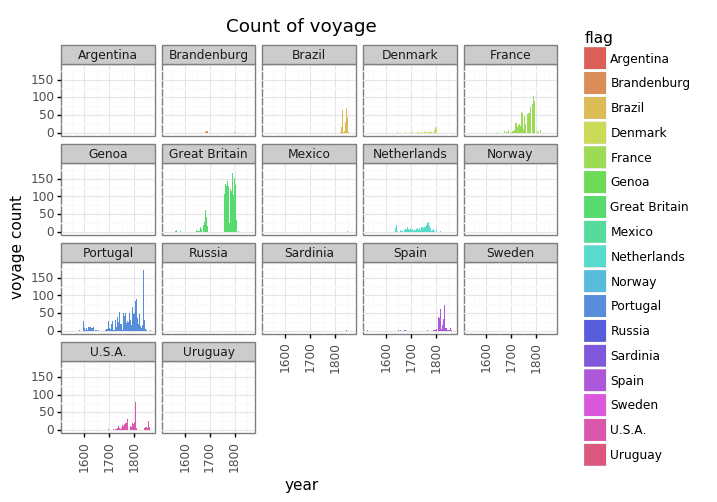

<ggplot: (-9223372036842503641)>

In [19]:
p9.ggplot(count_yr, p9.aes(x='year', y='voyageid',fill='flag')) + p9.geom_col(stat = 'identity')\
+ p9.labels.ggtitle('Count of voyage') + p9.labels.ylab('voyage count')\
+ p9.theme_bw()\
+ p9.theme(axis_text_x = p9.themes.element_text(rotation=90))+p9.facet_wrap('~flag')

5. I used geom_col as geomtric elements; Used __year__ of voyage departure as x axis, count of voyage as y axis, used fill to distinguish differnt nations; I also used theme_bw to change the backgroud and x labe text positioin; used labels to change change title and y label
6. As we can see in the plot, voyage counts of principal slave-trading flags like Great Britain, France and Netherland dropped rapidly in 1800s and there were almost no slave trade after 1830. The reason for this is nations started to ban slave trade after 1800. Therefore, slave trade became an illegal activity in some countries.

**Exercise 4.** Looking at some of these ships.

1. Search for the slave ship mentioned in the following wikipedia article: https://en.wikipedia.org/wiki/Brookes_(ship) Hint: Look at all records of ships with 'Brook' in the name and try to match the characteristics to those described.  How many voyages for this ship are in the data (try to exclude ships with the same name)?
2. Create a variable that is True if there was a resistance (like a slave revolt) on the ship.  Plot the density of ships as a function of year with and without revolts and compare these distributions.
3. The movie Amistad was based on a real slave ship and slave uprising.  Read about it here: https://en.wikipedia.org/wiki/La_Amistad  Try to find this ship by searching for it by name and also searching for ships in the same 10 year period as this event with a slave resistance.  If you think you found it describe it, otherwise describe the events of another voyage that you did find.  

Additional information fo Brookes ship: http://www.virtualjamestown.org/map4b.html. It was built on 1781 in Liverpool, weighted 297 tons

In [20]:
brook = ndata[ndata.shipname.str.contains('brook',na=False,case=False)]
brookes = brook.query('national == 7 & placcons == 10432 & yrcons==1781 & tonnage==297')
print('1. There are {} voyages for this ship in the data'.format(brookes.shape[0]))
brookes

1. There are 4 voyages for this ship in the data


,voyageid,evgreen,shipname,national,placcons,yrcons,placreg,yrreg,rig,tonnage,...,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer,year
29534,80663,1.0,Brooks,7.0,10432.0,1781.0,10432.0,1781.0,4.0,297.0,...,"Crooks,55","LList, 19 Nov 1782","LList, 25 Feb 1783","Williams,585-86",NaN,NaN,NaN,NaN,NaN,1782.0
29535,80664,1.0,Brooks,7.0,10432.0,1781.0,10432.0,1783.0,4.0,297.0,...,"Lambert,73,81-101","Lambert,73,109-21","LList, 20 July 1784","LList, 6 Aug 1784","LList, 31 Aug 1784",NaN,NaN,NaN,NaN,1784.0
29536,80665,1.0,Brooks,7.0,10432.0,1781.0,10432.0,1783.0,4.0,297.0,...,"Lambert,69,III,Appendix,Jamaica","LList, 31 Jan 1786","LList, 14 Apr 1786","Williams,585",NaN,NaN,NaN,NaN,NaN,1785.0
29537,80666,1.0,Brooks (a) Brookes,7.0,10432.0,1781.0,10432.0,1786.0,4.0,297.0,...,"Lambert,68,41-3","cc, 13 Oct 1787","craig,19","LList, 11 Dec 1787","LList, 12 Feb 1788",T70/1476,"Williams,585","Huntington,ST,vol.26,87.11.10.",NaN,1787.0


2. 

In [21]:
revolt = []
for val in ndata.resistance:
    if np.isnan(val)==True: #map nan with False: no resistance
        revolt.append(False) 
    else:
        revolt.append(True) #map numbers with True: has resistance

In [22]:
ndata['if_res'] = revolt
res = ndata[['if_res','year','shipname']]
res.set_index(['year','if_res','shipname'])
res = res.groupby(['year','if_res','shipname']).size().reset_index(name='count')#count number of voyage for year and if_resistance
res

,year,if_res,shipname,count
0,1525.0,False,S Maria de Bogoña,1
1,1527.0,False,Concepción,1
2,1532.0,False,S Antônio,1
3,1532.0,False,S João,1
4,1532.0,False,S Maria da Luz,1
5,1534.0,False,Conceição,1
6,1534.0,False,S Antônio,1
7,1535.0,False,S João,1
8,1535.0,False,S Miguel,1
9,1545.0,False,Galdame,1


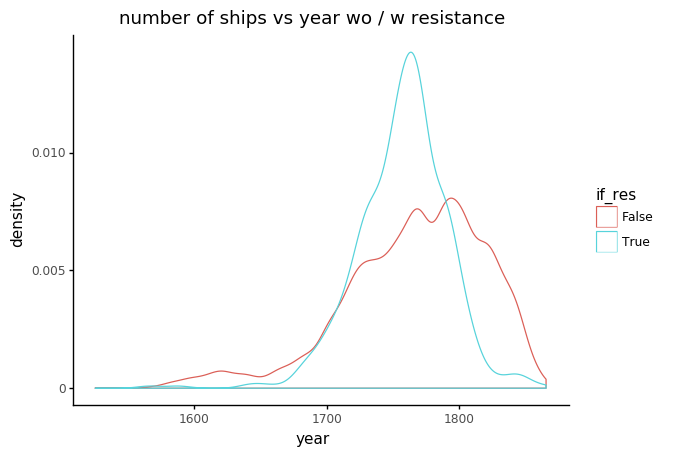

<ggplot: (13671565)>

In [23]:
#plot density for having resistance and not having resistance
p9.ggplot(res)+p9.aes('year',color='if_res')+p9.geom_density(alpha=.5)\
+p9.ggtitle('number of ships vs year wo / w resistance')+p9.xlab('year')\
+p9.theme_classic()

The movie Amistad was based on a real slave ship and slave uprising. Read about it here: https://en.wikipedia.org/wiki/La_Amistad Try to find this ship by searching for it by name and also searching for ships in the same 10 year period as this event with a slave resistance. If you think you found it describe it, otherwise describe the events of another voyage that you did find.

3. Since all thes ships that contains __'amista'__ in their names do not have resistance, the event is not in the data. However, in the same 10 years period (1830-1839), there are 2 ships has revolt and the more recent one happened in 1837. It was a Portuguese ship captained by Fonseca, Camilo Urbano da, with 352 slaves purchased, 46% fo them were man. The fate of the ship was 'Court of Mixed Commission, Sierra Leone, condemned'.

In [24]:
amistad = ndata[ndata.shipname.str.contains('amistad',case=False,na=False)] #search Al Amistad 

In [25]:
amistad.query('if_res==True')

,voyageid,evgreen,shipname,national,placcons,yrcons,placreg,yrreg,rig,tonnage,...,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer,year,if_res


In [26]:
in1830s = ndata.query('1830<=year<=1839')#search ships in the same period:1930s
in1830s=in1830s.query('if_res==True&year==1837')
in1830s.captaina
in1830s[['national','tslavesd','slaarriv','if_res','year','menrat7','fate','captaina']]

,national,tslavesd,slaarriv,if_res,year,menrat7,fate,captaina
2504,4.0,352.0,254.0,True,1837.0,0.461864,120.0,"Fonseca, Camilo Urbano da"


**Exercise 5.** Other patterns.

1. The arrival and departure locations are quite detailed.  Look in the appendix of the codebook for the location codes.  Make a coarser version of both arrival and departure port variables (select just the last departure and first arrival) so that for example,  
```
30000 Caribbean 36100 Martinique 36101 Fort-Royale
```
is just encoded as '3' or Caribbean.
2. Plot the trend of voyages as a function of arrival location.  What trends do you see?
3. Do the same for departure location.
4. Plot the ratio of captives that are men as a function of year.  Include a smoother to describe the over all trend.  Also include in the plot another possible confounding variable.
5. Describe the geoms, aesthetic mappings, and other aspects of the plot.

1.

In [27]:
def encode(series):
    """arg: series
return: a list of region encoded"""
    ls = []
    for value in series:
        if np.isnan(value)==True:
            ls.append(value)
        else:
            ls.append(int(str(value)[0]))
    return(ls)

In [28]:
dep_ls = []
"""the last departure location depends on where the ship landed their slaves at the end
Therefore, check if the ship made purchased in the second place and the third place.
Order: 'plac3tra'>'plac2tra'>'plac1tra'
"""
for i in range(len(ndata)):
    purs = ndata.loc(0)[i][['plac1tra','plac2tra','plac3ra']]
    if np.isnan(purs[2])==False:
        dep_ls.append(purs[2])
    elif np.isnan(purs[1]) == False:
        dep_ls.append(purs[1])
    else:
        dep_ls.append(purs[0])

In [29]:
ndata['ladeploc'] = dep_ls

In [30]:
arr_loc = encode(ndata.sla1port)#first arrival
dep_loc = encode(ndata.ladeploc)#last departure
ndata['arr_loc'] = arr_loc
ndata['dep_loc'] = dep_loc

In [31]:
region = {1:'Europe',2:'Mainland North America',3:'Caribbean',4:'Spanish Mainland America',5:'Brazil',6:'Africa',8:'Other'}

In [32]:
#map endcode number to string
ndata['arr_loc'] = ndata.arr_loc.map(region)
ndata['dep_loc'] = ndata.dep_loc.map(region)

2. 

In [33]:
arr_df = ndata[['arr_loc','year']]
arr_df=arr_df.set_index(['arr_loc','year'])
arr_df = arr_df.groupby(['arr_loc','year']).size().reset_index(name='count') #count number of ships per year per arrival location
arr_df

,arr_loc,year,count
0,Africa,1647.0,1
1,Africa,1658.0,2
2,Africa,1673.0,1
3,Africa,1684.0,2
4,Africa,1685.0,1
5,Africa,1699.0,1
6,Africa,1700.0,2
7,Africa,1734.0,1
8,Africa,1768.0,2
9,Africa,1769.0,1


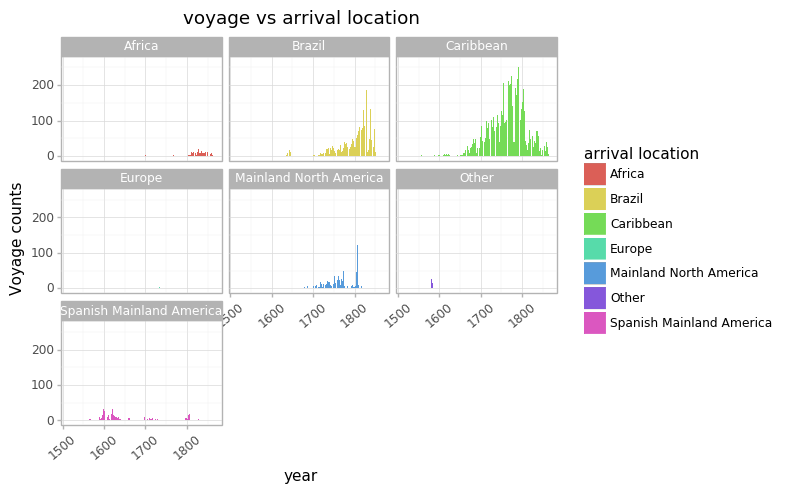

<ggplot: (12268222)>

In [34]:
p9.ggplot(arr_df, p9.aes(x='year', y='count',fill='arr_loc')) + p9.geom_col()\
+p9.ylab('Voyage counts')+p9.xlab('year')+p9.theme_light()\
+p9.theme(axis_text_x = p9.themes.element_text(rotation=40))\
+p9.labs(fill='arrival location')+p9.ggtitle('voyage vs arrival location')+p9.facet_wrap('~arr_loc')

4.

In [35]:
men_ratio = ndata[['menrat7','year','malrat7','tslavesd']]

In [36]:
men_ratio = ndata[['menrat7','year','tslavesd']].dropna()
# b = men_ratio.groupby('year').apply(lambda x: x.tslavesd*x.menrat7)
men_ratio['men']= pd.DataFrame(men_ratio.apply(lambda x: x.tslavesd*x.menrat7,axis=1))
gby = men_ratio.groupby('year')['men','tslavesd'].sum()
# gby['ratio'] = gby.men/gby.tslavesd
# summ = gby.sum()


In [37]:
gby['ratio'] = gby.men/gby.tslavesd
gby.reset_index(inplace=True)
gby

,year,men,tslavesd,ratio
0,1628.0,62.579710,254.0,0.246377
1,1636.0,187.905882,484.0,0.388235
2,1641.0,248.571880,623.0,0.398992
3,1642.0,472.710000,1089.0,0.434077
4,1643.0,862.762444,2130.0,0.405053
5,1657.0,160.659341,680.0,0.236264
6,1659.0,81.000000,195.0,0.415385
7,1663.0,131.793333,373.0,0.353333
8,1664.0,740.561092,1378.0,0.537417
9,1665.0,391.243239,754.0,0.518890


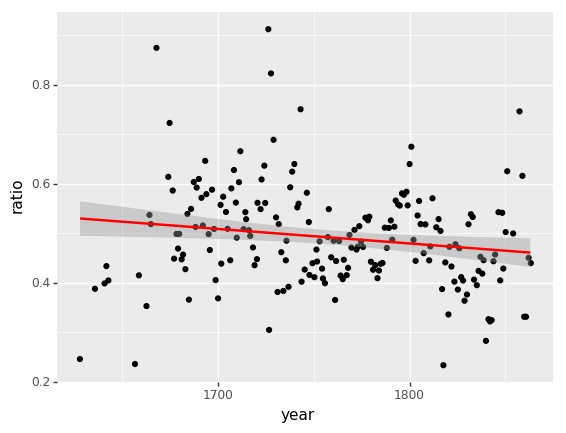

<ggplot: (12269039)>

In [38]:
p9.ggplot(gby,p9.aes(x='year',y='ratio'))+p9.geom_jitter()\
+p9.stat_smooth(method='lm',color='red')\
# +p9.ylab('men ratior')+p9.ggtitle('men ratio over year')+p9.labs(fill='male rate')

In [39]:
p9.ggplot(men_ratio.dropna(),p9.aes(x='year',y='menrat7',fill='malrat7'))+p9.geom_jitter()\
+p9.stat_smooth(method='lm',color='red')\
+p9.ylab('men ratior')+p9.ggtitle('men ratio over year')+p9.labs(fill='male rate')

PlotnineError: "Could not evaluate the 'fill' mapping: 'malrat7' (original error: name 'malrat7' is not defined)"

5. Used geom_jitter to plot points, used stat_smooth to fit linear regression line, used y_lab and ggtitle to change text

**Exercise 6.** Estimating total captives count I.

1. Plot the number of slaves at departure from last slaving and the number that arrived at the first port of disembarkation.  
2. Why do these variables concentrate near a line?  Most of the data lies on one side of the line, but a small fraction do not, what could have happened for those that did not?  Separate the data into these two populations.
3. For those voyages where the number of captives decreased (through death), calculate a death rate (ratio of captives that died).  
4. Plot this death rate as a function of year.  Make any appropriate scale transformations, and include a trend line or other smoother.  What is your interpretation?
5. Guess at two possible predictors and create visualizations that give you a sense of their association with the death rate.  Make sure that one of these is categorical, and plot it with the death rate and year so that there are three variables used in the same plot.
6. For these plots, list the geoms, aesthetic mappings, scales, and other notable aspects used.

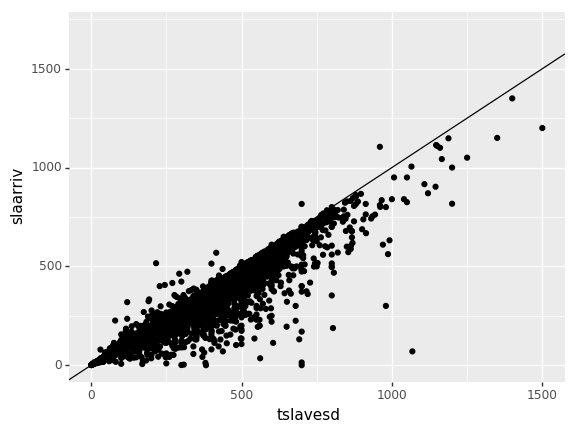

<ggplot: (14051830)>

In [44]:
p9.ggplot(ndata) + p9.aes(x='tslavesd',y='slaarriv') + p9.geom_point() \
+ p9.geoms.geom_abline(mapping=p9.aes(slope=1,intercept=0))
#+ p9.stat_smooth(method='lm',color='red')

2
- Because they are high correlated that as the number of slaves at departure from last slaving increases, the number that arrived at the first port of disembarkation increases.
- During the middle passage more slaves are captured so that there are more slaves at the first port of disembarkation than that at departure from last slaving port.

In [45]:
de_ar_rat = ndata.slaarriv/ndata.tslavesd 
ndata['de_ar_rat'] = de_ar_rat
above = ndata.query('de_ar_rat>=1') #more slaves at arrival than that at departure
below = ndata.query('de_ar_rat<1') #less slaves at arrival than that at departure

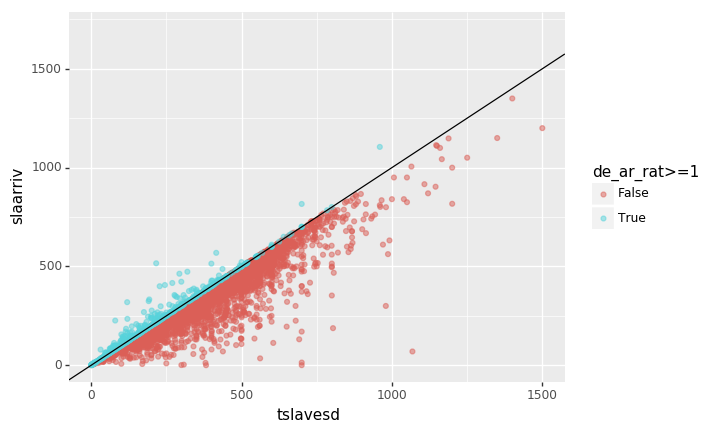

<ggplot: (-9223372036842308057)>

In [46]:
p9.ggplot(ndata) + p9.aes(x='tslavesd',y='slaarriv',color = 'de_ar_rat>=1') + p9.geom_jitter(alpha=0.5) \
+ p9.geoms.geom_abline(mapping=p9.aes(slope=1,intercept=0))

3.

In [47]:
deathrat = (below.tslavesd-below.slaarriv)/below.tslavesd #dead rate below the slope
below['deathrat'] = deathrat
below.deathrat

11       0.153125
16       0.090150
17       0.008639
18       0.119461
19       0.026059
20       0.141680
21       0.040404
22       0.240705
24       0.065315
25       0.031674
26       0.058394
27       0.122278
28       0.108059
29       0.043614
30       0.117207
31       0.022779
32       0.120596
33       0.175644
34       0.051546
35       0.026190
36       0.128000
37       0.110906
38       0.045510
39       0.156652
40       0.148980
41       0.155556
42       0.241135
43       0.098160
44       0.053879
45       0.161765
           ...   
34300    0.263158
34569    0.200000
34574    0.247664
34577    0.014085
34578    0.368421
34579    0.376000
34580    0.389610
34584    0.033333
34589    0.175000
34595    0.271505
34596    0.010000
34597    0.303333
34598    0.461140
34599    0.829787
34601    0.500000
34604    0.252336
34605    0.493750
34609    0.144737
34610    0.166667
34612    0.447619
34613    0.666667
34614    0.232759
34628    0.396135
34664    0.080000
34665    0

4.

In [48]:
dearat=below[['deathrat','year','menrat7','national']]
dearat

,deathrat,year,menrat7,national
11,0.153125,1817.0,NaN,NaN
16,0.090150,1817.0,NaN,NaN
17,0.008639,1817.0,NaN,NaN
18,0.119461,1817.0,NaN,NaN
19,0.026059,1817.0,NaN,NaN
20,0.141680,1817.0,NaN,NaN
21,0.040404,1817.0,NaN,NaN
22,0.240705,1817.0,NaN,NaN
24,0.065315,1817.0,NaN,NaN
25,0.031674,1817.0,NaN,NaN


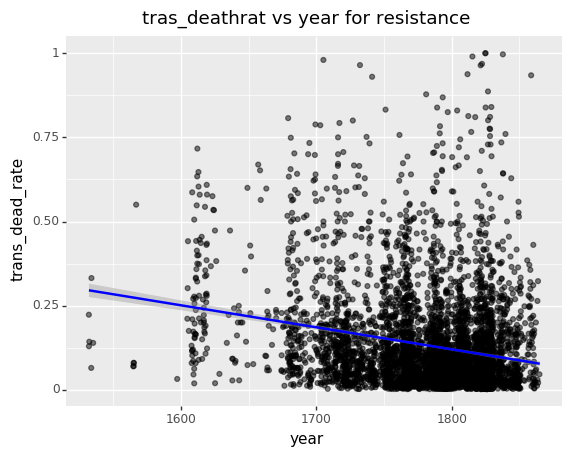

<ggplot: (13854577)>

In [50]:
p9.ggplot(dearat) + p9.aes(y='deathrat',x='year') + p9.geom_jitter(alpha=0.5) \
+ p9.stat_smooth(method='lm',color='blue')\
+p9.ggtitle('tras_deathrat vs year for resistance')+p9.ylab('trans_dead_rate')

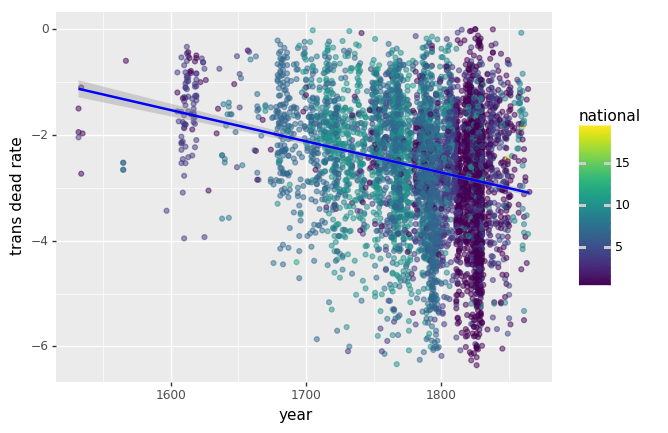

<ggplot: (-9223372036841058886)>

In [226]:
#5 Use if_res as additional variable
p9.ggplot(dearat) + p9.aes(y='np.log(deathrat)',x='year',color='national') + p9.geom_point(alpha=0.5) \
+ p9.stat_smooth(method='lm',color='blue')+p9.ylab('trans dead rate')

6. Used color to separate data for different nations, used geom_jitter to plot points, fit a linear model used stat_smooth

**Exercise 7.** Estimating total captives count II.

1. Using the variables selected, fit a prediction of death rate using linear regression and some simple transformations/scales.  You do not need to spend time doing automated model selection, just include the most likely predictor or predictors from the previous question.
2. We will impute the number of captives on board at departure, so enumerate the cases for missingness of the variables involved in the prediction.
3. We would like to predict the number of captives on departure from the number that arrived with the following formula,
$$
\textrm{arrived} = \pi (1 - \textrm{death rate}) \cdot (\textrm{captives taken}) + (1- \pi) (\textrm{average increase})
$$
where $\pi$ is the proportion of voyages with no increase in captives, and the average increase is over those that did see an increase. 
For those voyages with captives taken missing and arrived not missing, use the estimated death rate to predict the captives taken.
4. Impute the remainder by predicting the captives taken with the year variable, you can use simple linear regression.
5. With the same formula and method impute the number of captives upon arrival whenever it is missing.
6. Give a new estimate of the predicted total number of captives taken on the middle passage, the total number of deaths, and the overall death rate.  How does this differ from your first estimate obtained by assuming MCAR?

1. Altough the R^2 is very low, menrat7 and national are both significant to the model.

In [227]:
dr_nona=below[['deathrat','year','malrat7','national']].dropna() #drop missing value

In [228]:
X = dr_nona[['malrat7','national']]
y= np.log(dr_nona.deathrat) #perform log transformation
X = sm.add_constant(X) #add an intercept for the model 
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               deathrat   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     23.59
Date:                Fri, 09 Nov 2018   Prob (F-statistic):           8.23e-11
Time:                        13:56:58   Log-Likelihood:                -2350.6
No. Observations:                1491   AIC:                             4707.
Df Residuals:                    1488   BIC:                             4723.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2365      0.197    -11.346      0.0

3.

In [229]:
pi = below.shape[0]/(below.shape[0]+above.shape[0])#calculate the proportion
ai = sum(above.slaarriv-above.tslavesd)/above.shape[0] #calculate average increase over captives increase
taken = (below.slaarriv - (1+pi)*ai)/(1-below.deathrat)
taken

11       618.014906
16       578.536592
17       444.219120
18       497.855433
19       594.883216
20       585.308050
21       574.597431
22       486.479077
24       424.080313
25       422.772353
26       117.226730
27       575.787557
28       525.125729
29       301.532316
30       379.909409
31       419.947373
32       716.828126
33       404.414337
34       368.369492
35       400.880628
36       478.648364
37       520.058884
38       793.493630
39       443.922952
40       468.121998
41       517.951627
42       257.465175
43       468.354856
44       444.321087
45       453.788305
            ...    
34300     88.731864
34569    576.726717
34574    189.252261
34577    265.115393
34578    407.520508
34579    220.162458
34580    123.497144
34584     40.739352
34589    377.431968
34595    346.442328
34596    181.193307
34597    273.274699
34598    158.448126
34599    266.615570
34601     82.762747
34604     82.097587
34605    123.222466
34609    130.230529
34610    -10.342352


4

In [230]:
lm = linear_model.LinearRegression() 
model = lm.fit(below[['year']],below[['tslavesd']]) #predict captives that is smaller than arrival on year
pre = model.predict(below[['year']])
remainder = below[['tslavesd']] - pre #remainder = tslavesd data - predicted tslavesd
remainder.columns = ['imputed_remainder'] 
remainder

,imputed_remainder
11,246.845561
16,205.845561
17,69.845561
18,125.845561
19,220.845561
20,213.845561
21,200.845561
22,117.845561
24,50.845561
25,48.845561


In [231]:
pre

array([[393.15443926],
       [393.15443926],
       [393.15443926],
       ...,
       [302.46294657],
       [394.93270382],
       [415.38274629]])

5.

In [232]:
model2 = lm.fit(below[['year']],below[['slaarriv']])
arr_pre = model.predict(below[['year']]) #predict arrived captives for ships had increased captives during middle passage
arr_pre

array([[349.52120692],
       [349.52120692],
       [349.52120692],
       ...,
       [248.39125314],
       [351.50414719],
       [374.3079603 ]])

6. Used __year__ and __if_res__ to predict total number of captives taken on the middle passage because they have all recorded data that are relatively accountable. Compared with the first estimation in q2, the old estimation have much more missing values (34887). 

In [233]:
no_na = ndata[['tslavesd','year','if_res']].dropna()

In [234]:
model3 = lm.fit(no_na[['year','if_res']],no_na[['tslavesd']]) #predicted captives using year and if_res
tot_pre = model3.predict(ndata[['year','if_res']]) #predict for all the data
tot_pre

array([[361.12016302],
       [361.12016302],
       [361.12016302],
       ...,
       [383.60110798],
       [383.60110798],
       [383.60110798]])

In [235]:
pre_dea = tot_pre - ndata[['slaarriv']] #predicted total death 
pre_dea.columns = ['predicted dead']
pre_dea

,predicted dead
0,71.120163
1,138.120163
2,11.120163
3,19.120163
4,-154.879837
5,-153.879837
6,157.120163
7,-12.879837
8,16.120163
9,-116.879837


In [236]:
pre_dr = (tot_pre - ndata[['slaarriv']])/tot_pre #predicted overall death rate
pre_dr.columns = ['predicted deathrate']
pre_dr

,predicted deathrate
0,0.196943
1,0.382477
2,0.030794
3,0.052947
4,-0.428887
5,-0.426118
6,0.435091
7,-0.035666
8,0.044639
9,-0.323659


In [237]:
sum(est_tot.isna()) #count the missing values for first estimation

34887

In [238]:
sum(np.isnan(tot_pre)) #count the missing values for new estimation

array([0])